## Notebook 7B  - Mon/Tues
### Numerical Calculations of Electric Fields, Flux & Gauss' Law Part II
#### PHYS 225 Intro to Computational Physics, Fall 2020
#### Total Points: 4

In this notebook we wil build on the work from the previous notebook.  We will numerically show how Gauss' Law

$$ \Phi_E = \oint_\mathrm{surface} \vec{E}\cdot\widehat{n}\;dA = \frac{Q_\mathrm{enclosed}}{\epsilon_0}$$

holds as a point charge moves from outside the cube, through the cube, and back out the other side. We will examine the flux through each individual face as well as the combined flux.

In [1]:
import numpy as np

from scipy.constants import epsilon_0

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

# Task 1: Copy over functions from PS7B

1. `point_charge_field()`
2. The 6 flux equations for each side of cube (`flux_x_pos()`, `flux_x_neg()`, ...)
3. `flux_cube_total()`


In [3]:
""" Define a function point_charge_field() function
Returns list of electric field values. """

### BEGIN SOLUTION
def point_charge_field(x,y,z,xq,yq,zq,q) :
    
    r = ( (x-xq)**2 + (y-yq)**2 + (z-zq)**2 )**0.5
    Emag = 1/(4*np.pi*epsilon_0) * q * 1/r**2
    Ex =  Emag * (x-xq)/r
    Ey =  Emag * (y-yq)/r
    Ez =  Emag * (z-zq)/r
    
    return [Ex,Ey,Ez]


### END SOLUTION

In [21]:
""" Define flux_x_pos() """

### BEGIN SOLUTION

def flux_x_pos(xq, yq, zq, Nsteps):
    X = 1  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    zrange = np.linspace(-1, 1, Nsteps)

    Y, Z = np.meshgrid(yrange, zrange)

    # dA calculation
    dy = yrange[1] - yrange[0]
    dz = zrange[1] - zrange[0]
    dA = dy * dz

    # components of the normal vector
    nx = 1
    ny = 0
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [22]:
""" Define flux_x_neg() """

### BEGIN SOLUTION

def flux_x_neg(xq, yq, zq, Nsteps):
    X = -1  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    zrange = np.linspace(-1, 1, Nsteps)

    Y, Z = np.meshgrid(yrange, zrange)

    # dA calculation
    dy = yrange[1] - yrange[0]
    dz = zrange[1] - zrange[0]
    dA = dy * dz

    # components of the normal vector
    nx = -1
    ny = 0
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [23]:
""" Define flux_y_pos() """

### BEGIN SOLUTION

def flux_y_pos(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    Y = 1
    zrange = np.linspace(-1, 1, Nsteps)

    X, Z = np.meshgrid(xrange, zrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dz = zrange[1] - zrange[0]
    dA = dx * dz

    # components of the normal vector
    nx = 0
    ny = 1
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [24]:
""" Define flux_y_neg() """

### BEGIN SOLUTION

def flux_y_neg(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    Y = -1
    zrange = np.linspace(-1, 1, Nsteps)

    X, Z = np.meshgrid(xrange, zrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dz = zrange[1] - zrange[0]
    dA = dx * dz

    # components of the normal vector
    nx = 0
    ny = -1
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [25]:
""" Define flux_z_pos() """

### BEGIN SOLUTION

def flux_z_pos(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    Z = 1

    X, Y = np.meshgrid(xrange, yrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dy = yrange[1] - yrange[0]
    dA = dx * dy

    # components of the normal vector
    nx = 0
    ny = 0
    nz = 1

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [26]:
""" Define flux_z_neg() """

### BEGIN SOLUTION

def flux_z_neg(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    Z = -1

    X, Y = np.meshgrid(xrange, yrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dy = yrange[1] - yrange[0]
    dA = dx * dy

    # components of the normal vector
    nx = 0
    ny = 0
    nz = -1

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)


# Print out some test conditions
xq = 0; yq = 0; zq = 0; Nsteps = 1000
print( flux_x_pos(xq, yq, zq, Nsteps) )
print( flux_x_neg(xq, yq, zq, Nsteps) )
print( flux_y_pos(xq, yq, zq, Nsteps) )
print( flux_y_neg(xq, yq, zq, Nsteps) )

print( flux_z_pos(xq, yq, zq, Nsteps) )
print( flux_z_neg(xq, yq, zq, Nsteps) )

### END SOLUTION

1413319.4076698194
1413319.4076698194
1413319.4076698194
1413319.4076698194
1413319.4076698194
1413319.4076698194


In [27]:
""" Define the function flux_cube_total() """

### BEGIN SOLUTION

def flux_cube_total(xq, yq, zq, Nsteps) :
    flux_total  = \
    flux_x_pos(xq, yq, zq, Nsteps) + flux_x_neg(xq, yq, zq, Nsteps) +  \
    flux_y_pos(xq, yq, zq, Nsteps) + flux_y_neg(xq, yq, zq, Nsteps) +  \
    flux_z_pos(xq, yq, zq, Nsteps) + flux_z_neg(xq, yq, zq, Nsteps)
    return flux_total

# END SOLUTION

In [28]:
""" Test cases for the point_charge_potential() function"""
from scipy.constants import e  # electron charge  magnitude

def vector_error(studentresult, instructorresult) :
    studentvec = np.array(studentresult)
    instructorvec = np.array(instructorresult)
    error = np.linalg.norm(studentvec - instructorvec)/np.linalg.norm(instructorvec)
    return error
    
studentresult = point_charge_field(1,2,3,10,-3,6, e)
instructorresult = [-1.050866493468196e-11, 5.838147185934422e-12, -3.5028883115606537e-12]
assert vector_error(studentresult, instructorresult ) < 1e-5
del studentresult, instructorresult, vector_error

""" Test cases for the 6 functions that calculate flux through each of 6 sides """
xq = 0; yq = 0; zq = 0; Nsteps = 1000
assert abs(flux_x_pos(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_x_neg(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_y_pos(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_y_neg(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_z_pos(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_z_neg(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2

""" Test cases for flux_cube_total() function """

assert abs ( flux_cube_total(2,0,0,1000)/ 8470568 ) < 0.01 
assert abs ( flux_cube_total(0,-2,0,1000)/ 8470568 ) < 0.01 
assert abs ( flux_cube_total(0,0,0,1000) -  8470568)/ 8470568 < 0.01
assert abs ( flux_cube_total(0.5,0.5,0.5,1000) -  8470568)/ 8470568 < 0.01


### Task 2: Implement the Equation of a Line in Three Dimensions

The equation of a line that we use in the plane is not so useful in more than two dimensions.  However, with vectors, we can parametrize a line very easily in three (*or more*) dimensions.  In the figure below, points $P_1$ and $P_2$ define a line.

![Parametrized Line](ParametrizedLine.png)

Once we choose a coordinate system, then points $P_1$ and $P_2$ may be represented, relative to the origin, by the vectors points $\vec{P}_1$ and $\vec{P}_2$.  We may also create a unit vector, $\widehat{u}$ defined as

$$ \widehat{u} = \frac{\vec{P}_2 - \vec{P}_1}{\left| \vec{P}_2 - \vec{P}_1 \right|} $$

Then any point on the line may be represented as 

$$ \vec{x}_t = \vec{P}_1 + t\;\widehat{u} $$ 

where $t$ is any real number 

$$ t \in (-\infty, \infty) $$

Your task here is to implement a function that calculates points along a parameterized line.

### Function Name

`param_line`

### Input Parameters 

* `p1x` : x coordinate of 1st point
* `p1y` : y coordinate of 1st point
* `p1z` : z coordinate of 1st point
* `p2x` : x coordinate of 2nd point
* `p2y` : y coordinate of 2nd point
* `p2z` : z coordinate of 2nd point
* `t`   : scalar parameter 

### Return Value

`[x, y, z]` : a list of the three coordinates for a point along the line


In [4]:
""" Implement Task 4: Define function param_line """


### BEGIN SOLUTION ### 

# Solution 1, Dr. Rob's original solution 
def param_line(p1x, p1y, p1z, p2x, p2y, p2z, t):
    delx = p2x - p1x
    dely = p2y - p1y
    delz = p2z - p1z
    r = np.sqrt(delx**2 + dely**2 + delz**2)
    assert(len != 0)
    return p1x + t * delx/r, p1y + t * dely/r, p1z + t * delz/r

# solution 2, Dr. Zwickl's solution
def param_line(p1x, p1y, p1z, p2x, p2y, p2z, t) :
    r = ( (p2x - p1x)**2 + (p2y - p1y)**2 + (p2z - p1z)**2 )**0.5
    x = p1x + t * (p2x - p1x)/r
    y = p1y + t * (p2y - p1y)/r
    z = p1z + t * (p2z - p1z)/r
    return [x,y,z]

ans1x, ans1y, ans1z = param_line(2.,-3.,5.,-7.,11.,13., 2.5)
#print (ans1x, ans1y, ans1z)

t = np.linspace(-10,10,21)
ans2x, ans2y, ans2z = param_line(2.,-3.,5.,-7.,11.,13., t)
#print (ans2x)
#print (ans2y)
#print (ans2z)

### END SOLUTION ###

In [5]:
ans1x, ans1y, ans1z = param_line(2.,-3.,5.,-7.,11.,13., 2.5)
assert(abs(ans1x - 0.7815566875837647)/0.7815566875837647 < 1.0e-6)
assert(abs(ans1y + 1.1046437362414119)/1.1046437362414119 < 1.0e-6)
assert(abs(ans1z - 6.083060722147764)/6.083060722147764 < 1.0e-6)

t = np.linspace(-10,10,21)
ans2x, ans2y, ans2z = param_line(2.,-3.,5.,-7.,11.,13., t)
assert((ans2x[0]-6.87377325)/6.87377325  < 1e-5)
assert((ans2x[5]-4.43688662)/4.43688662  < 1e-5)
assert((ans2y[0]+10.58142506)/10.58142506  < 1e-5)
assert((ans2y[5]+6.79071253)/6.79071253  < 1e-5)
assert((ans2z[0]-0.66775711)/0.66775711  < 1e-5)
assert((ans2z[5]-2.83387856)/2.83387856  < 1e-5)

# Task 3: Plot Some Lines in 3 Dimensions

#### First Line (solution is given)

* $\vec{P}_1 = (2, -3, 5)$
* $\vec{P}_2 = (-7,11,13)$
* Using `linspace` generate values of tparameter $t$ between $0$ and $20$
* Using `param_line` generate the points along the line defined by $\vec{P}_1$ and $\vec{P}_2$ for the values of $t$ just generated.
* Construct a 3D plot and graph the line just created.

#### Second Line

* Create a line through the point $\vec{P}_1 = (-3, 2, 5)$ that is parallel to the $z$ axis.  
* Have the line extend $10$ units in either direction from $\vec{P}_1$.
* Generate the points using `param_line` and add the line to the same plot as the first line.

#### Third Line

* Create a line through the point $\vec{P}_1 = (4, -2, -3)$ that is parallel to the $x$ axis.  
* Have the line extend $10$ units in either direction from $\vec{P}_1$.
* Generate the points using `param_line` and add the line to the same plot as the first and second lines.

<IPython.core.display.Javascript object>


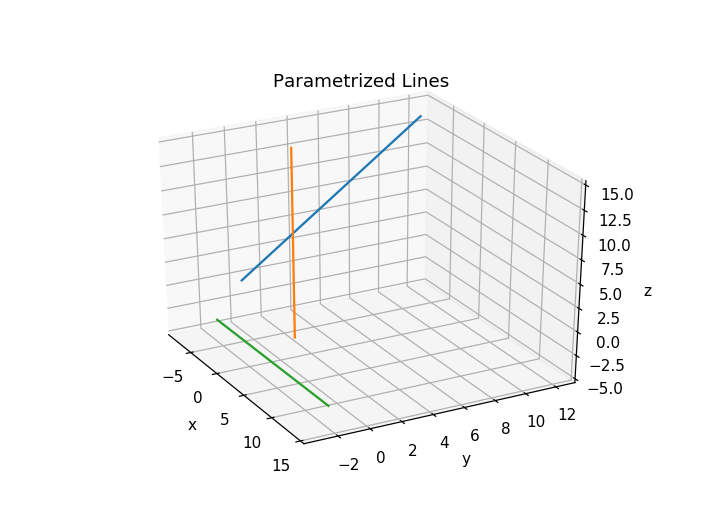

In [77]:
""" Implement Task 5 """

t = np.linspace(0,20,21)
X, Y, Z = param_line(2,-3,5,-7,11,13, t)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X,Y,Z)


ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Parametrized Lines")

# Add code for 2nd and 3rd lines below.

### BEGIN SOLUTION


t = np.linspace(-10, 10, 21)
X, Y, Z = param_line(-3.,2.,5.,-3.,2.,6., t) 
ax.plot(X,Y,Z)

X, Y, Z = param_line(4.,-2.,-3.,5.,-2.,-3., t) 
ax.plot(X,Y,Z)



### END SOLUTION

In [8]:
assert(True)

# Task 4: Calculate and plot the flux along a line passing though cube

1. Define a line that passes through the cube (you can pick).
2. You will probably need to use a loop to calculate the flux for each of the points along the line.
For a line segment of your choosing that passes through the cube make 
1. a plot of the flux through each of the 6 faces as a function of $t$ the line parameter.
2. a plot of the total flux through the cube

You should create two plots which look similar to these, which were produced for 

    x1, y1, z1 = [-2, 0.25, 0.5]  # define starting point (off center, -x side of cube)
    x2, y2, z2 = [-1, 0.25, 0.5]  # define 2nd point on line (move in +x direction)

![Flux through cube example](Flux_thru_cube_example.PNG)


Len(t) =  100
Len(xpos_list) =  100


<IPython.core.display.Javascript object>


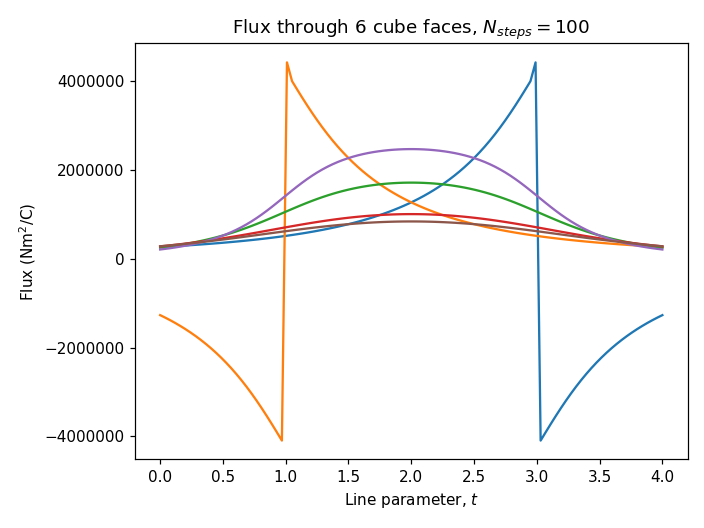

<IPython.core.display.Javascript object>


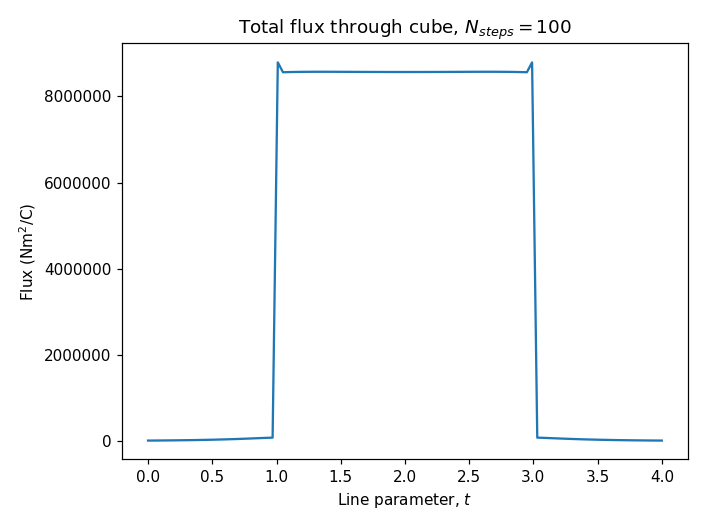

In [75]:
""" Plots of flux vs position """

# define the start and end points (try changing these)
x1, y1, z1 = [-2,.25,0.5]
x2, y2, z2 = [-1, 0.25, 0.5]

# define the t parameter range


# create empty lists to store the flux values


# define the number of steps in the flux integrals
Nsteps = 100

# for loop over the t-values to calculate flux along line
# calculate charge position each step of loop
# append calculated flux for each step of loop


# create figure of the flux through each of 6 faces vs t parameter


# create figure of the total flux vs t

### BEGIN SOLUTION

# define the start and end points
x1, y1, z1 = [-2,.25,0.5]
x2, y2, z2 = [-1, 0.25, 0.5]

# define the t parameter range
t = np.linspace(0,4,100)  # define range of t values

# create empty lists to store the flux values
xpos_list = []
xneg_list = []
ypos_list = []
yneg_list = []
zpos_list = []
zneg_list = []
total_list = []

# define the number of steps in the flux integrals
Nsteps = 100

# Loop over the t-values to calculate flux along line
# Append calculated values each step
for tq in t :
    xq, yq, zq = param_line(x1,y1,z1, x2, y2,z2, tq)
        
    xpos_list.append( flux_x_pos(xq,yq,zq,Nsteps) )
    xneg_list.append( flux_x_neg(xq,yq,zq,Nsteps) )
    ypos_list.append( flux_y_pos(xq,yq,zq,Nsteps) )
    yneg_list.append( flux_y_neg(xq,yq,zq,Nsteps) )
    zpos_list.append( flux_z_pos(xq,yq,zq,Nsteps) )
    zneg_list.append( flux_z_neg(xq,yq,zq,Nsteps) )
    total_list.append( flux_cube_total(xq, yq, zq, Nsteps) )

    
    
print("Len(t) = ", len(t))
#print("Len(xq) = ", len(xq))
print("Len(xpos_list) = ", len(xpos_list))

# create figure of the flux through each of 6 faces vs t parameter
plt.figure()
plt.plot(t,xpos_list, label = "+x")
plt.plot(t,xneg_list, label = "-x")
plt.plot(t,ypos_list, label = "+y")
plt.plot(t,yneg_list, label = "-y")
plt.plot(t,zpos_list, label = "+z")
plt.plot(t,zneg_list, label = "-z")
plt.title("Flux through 6 cube faces, $N_{steps} = $" + str(Nsteps) )
plt.ylabel("Flux (Nm$^2$/C)")
plt.xlabel("Line parameter, $t$")
plt.tight_layout()

# create figure of the total flux vs t
plt.figure()
plt.plot(t, total_list, label = "Total")
plt.title("Total flux through cube, $N_{steps} = $" + str(Nsteps) )

plt.xlabel("Line parameter, $t$")
plt.ylabel("Flux (Nm$^2$/C)")
plt.tight_layout()
#plt.legend()

### END SOLUTION

In [ ]:
""" Test case for Task 4. 
You should verify that the flux is appoximately zero when the charge
is outside of the cube, and the flux is approximately a constant
value of q/epsilon_0 when the charge is inside the cube.
"""